In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

In [6]:
x_train, y_train = list(), list()
x_test, y_test = list(), list()

train_letters = os.listdir("./notMNIST_large")
test_letters = os.listdir("./notMNIST_small")

count = 0;
for i, letter in enumerate(train_letters):
    fonts = os.listdir("./notMNIST_large/" + letter)
    print(str(letter)+ " " + str(len(fonts)))
    for j, font in enumerate(fonts):
        img = None
        try:
            img = plt.imread("./notMNIST_large/"+ letter + "/" + font)
        except:
            print(font + " " + letter)
        if img is None :
            count -= 1
            continue
        x_train.append(img.reshape([28*28]))
        y_train.append(np.zeros(10))
        y_train[count + j][i] = 1
    count += len(fonts)
print(count)

count = 0;
for i, letter in enumerate(test_letters):
    fonts = os.listdir("./notMNIST_small/" + letter)
    print(str(letter)+ " " + str(len(fonts)))
    for j, font in enumerate(fonts):
        img = None
        try:
            img = plt.imread("./notMNIST_small/"+ letter + "/" + font)
        except:
            print(font + " " + letter)
            #plt.imshow(img)
        #plt.imshow(img)
        if img is None :
            count -= 1
            continue
        x_test.append(img.reshape([28*28]))
        y_test.append(np.zeros(10))
        y_test[count + j][i] = 1
    count += len(fonts)
print(count)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

A 52912
RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png A
SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png A
Um9tYW5hIEJvbGQucGZi.png A
B 52912
TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png B
C 52912
D 52912
VHJhbnNpdCBCb2xkLnR0Zg==.png D
E 52912
F 52912
G 52912
H 52912
I 52912
J 52911
529114
A 1872
B 1873
C 1873
D 1873
E 1873
F 1872
G 1872
H 1872
I 1872
J 1872
18724
(529114, 784) (529114, 10)
(18724, 784) (18724, 10)


In [7]:
def shuffle(a,b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [8]:
x_train, y_train = shuffle(x_train,y_train)

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


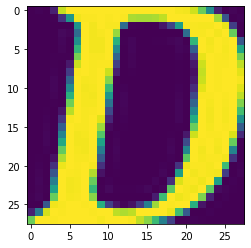

In [9]:
i = int(np.random.rand(1) * 18724)
plt.imshow(x_train[i].reshape([28,28]))
print(y_train[i])
time.sleep(1);

In [10]:
class NeuralNetwork:
    layers = list()
    
    w = list()
    b = list()
    
    a = list()
    z = list()
    
    da = list()
    db = list()
    dw = list()
    
    activators = list()
    
    depth = 0
    
    def relu(self, x):
        return np.maximum(0,x)
    
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def drelu(self, x):
        return x > 0
    
    def dsigmoid(self, x):
        sigx = self.sigmoid(x)
        return np.multiply(sigx, (1 - sigx))
    
    def __init__(self, input_size, layers_count, layers_size, activators, l_rate = 0.01):
        self.layers = list()
        self.w = list()
        self.b = list()
        self.a = list()
        self.z = list()
        
        self.activators = activators
        self.l_rate = l_rate
        
        self.layers.append(input_size)
        self.a.append(0)
        self.z.append(0)
        for x in range(0,layers_count):
            self.layers.append(layers_size[x])
            self.a.append(0)
            self.z.append(0)
        
        self.depth = len(self.layers)
        
        for x in range(1, self.depth):
            #matarr = np.ndarray(shape=(self.layers[x-1], self.layers[x]))
            matarr = np.random.normal(0,0.5, (self.layers[x-1], self.layers[x]))
            mat = np.matrix(matarr)
            self.w.append(mat)
            #print(mat)
            #barr = np.ndarray(self.layers[x])
            barr = np.random.normal(0,0.5, self.layers[x])
            #print(barr.shape)
            #barr = barr.reshape((barr.shape[0], 1))
            self.b.append(barr)
        
        
    def predict(self,input):
        self.a[0] = input
        #print(self.a[0])
        
        for x in range(1,self.depth):
            self.z[x] = np.matmul(self.a[x - 1], self.w[x - 1]) + self.b[x - 1]
            if self.activators[x - 1] == "sig":
                val = self.sigmoid(self.z[x])
            elif self.activators[x - 1] == "relu":
                val = self.relu(self.z[x])
            self.a[x] = val
            #print("wtf " + str(x) + str(self.a[x]))
        return self.a[self.depth - 1]
    
    def test(self, input, ans):
        prediction = self.predict(input)
        #c1 = np.array(list(np.array_equal(np.round(prediction[x]), ans[x]) for x in range(ans.shape[0])))
        c1 = np.array(list(np.argmax(prediction[x]) == np.argmax(ans[x]) for x in range(ans.shape[0])))
        #print(prediction)
        
        c = prediction - ans
        c = np.square(c)
        c = c.sum(axis = 1).mean()
        return {"mean_loss": c, "accuracy": c1.sum() / c1.shape[0]}
    
    def train(self, input, ans):
        prediction = self.predict(input)
        #print(input.shape[0])
        c = (prediction - ans)
        c = np.square(c)
        #print(c)
        
        c1 = np.array(list(np.argmax(prediction[x]) == np.argmax(ans[x]) for x in range(ans.shape[0])))
        
        prediction = np.swapaxes(prediction, 0,1)
        ans = np.swapaxes(ans, 0,1)
        
        self.da = list() # dC(0)/da(Lj)
        self.db = list() # dC(0)/db(Lj)
        self.dw = list() # dC(0)/dw(Ljk)
        
        for i, x in enumerate(self.layers):
            self.da.append(0)
            self.db.append(0)
            self.dw.append(0)
        #print(len(self.db))
        self.da[self.depth - 1] = 2 * (ans - prediction)
        #print(self.da[self.depth - 1])
        
        #print("a")
        for x in range(self.depth - 2, 0, -1):
            #print(x)
            #print(self.w[x].shape, self.da[x+1].shape)
            #a = np.asarray(np.matmul(self.w[x], da[x + 1]))
            a = np.matmul(self.w[x], self.da[x + 1])
            #print(a.shape)
            #print(type(a))
            #print(type(self.z[x]))
            #print(a.shape, self.z[x].shape)
            if self.activators[x - 1] == "sig":
                #a = np.multiply(a, np.asarray(self.dsigmoid(self.z[x])))
                a = np.multiply(a, np.swapaxes(self.dsigmoid(self.z[x]), 0, 1))
            elif self.activators[x - 1] == "relu":
                #a = np.multiply(a, np.asarray(self.drelu(self.z[x])))
                a = np.multiply(a, np.swapaxes(self.drelu(self.z[x]), 0, 1))
            #print(a)
            #print(a.shape)
            self.da[x] = a
        #print("b")
        for x in range(1, self.depth):
            #print(x)
            if self.activators[x - 1] == "sig":
                #a = np.multiply(a, np.asarray(self.dsigmoid(self.z[x])))
                b = np.multiply(self.da[x], np.swapaxes(self.dsigmoid(self.z[x]), 0, 1))
            elif self.activators[x - 1] == "relu":
                #a = np.multiply(a, np.asarray(self.drelu(self.z[x])))
                b = np.multiply(self.da[x], np.swapaxes(self.drelu(self.z[x]), 0, 1))
            #print(b)
            
            self.db[x] = b
            self.db[x] = np.mean(self.db[x], axis = 1)
            #print(self.db[x].shape)
            
        #print("w")
        for x in range(1, self.depth):
            
            
            _a = np.swapaxes(self.a[x - 1], 0, 1)
            
            w = np.zeros((_a.shape[0], self.da[x].shape[0], _a.shape[1]))
            
            for k in range(_a.shape[0]):
                for j in range(self.da[x].shape[0]):
                    w[k][j] = np.multiply(_a[k], self.da[x][j])
            
            self.dw[x] = w
            self.dw[x] = np.mean(self.dw[x], axis = 2)
            #print(self.dw[x].shape)
        
        for x in range(1, self.depth):
            self.w[x - 1] += self.dw[x] * self.l_rate
            
            self.b[x - 1] = np.reshape(self.b[x - 1], (self.b[x - 1].shape[0], 1))
            self.b[x - 1] += self.db[x] * self.l_rate
            self.b[x - 1] = np.squeeze(self.b[x - 1])
        
        return {"mean_loss": c.sum(axis = 1).mean(), "accuracy": c1.sum() / c1.shape[0]}

In [11]:
nn = NeuralNetwork(784,2,(16,10), ("relu", "sig"))

In [12]:
ans = nn.predict(x_train)

In [13]:
nn.train(x_train[:100], y_train[:100])
nn.test(x_train, y_train)
#nn.dw

{'mean_loss': 3.9177419137503233, 'accuracy': 0.08638970051822481}

In [19]:
batch_size = 1000
epochs = 5
nn.l_rate = 0.01

batches = x_train.shape[0] // batch_size
print("Stating Training on", x_train.shape[0], "samples, aka", batches, "batches.", epochs, "epochs total.")
#batch_length = int(np.floor(x_train.shape[0] / (batches)))
for y in range(epochs):
    for x in range(batches + 1):
        train_result = None
        if x == batches:
            if x_train.shape[0] != batch_size * batches:
                train_result = nn.train(x_train[batch_size * batches:], y_train[batch_size * batches:])
            break
        train_result = nn.train(x_train[batch_size * x : batch_size * (x + 1) - 1], y_train[batch_size * x : batch_size * (x + 1) - 1])
        #print("a")
        print("Epoch:", y + 1, "Batch:", x + 1, "Batch loss:", train_result["mean_loss"], "Batch accuracy:", train_result["accuracy"], end="\r")
    test_result = nn.test(x_test, y_test)
    train_result = nn.test(x_train, y_train)
    print("Epoch:", y + 1, "Finished!" ,"Train loss:", train_result["mean_loss"], "Train accuracy: ", train_result["accuracy"], "Test loss:", test_result["mean_loss"], "Test accuracy:", test_result["accuracy"])
    x_train, y_train = shuffle(x_train,y_train)
    

Stating Training on 529114 samples, aka 529 batches. 5 epochs total.
Epoch: 1 Finished! Train loss: 0.27492802182167714 Train accuracy:  0.8100598358765786 Test loss: 0.18688345182854657 Test accuracy: 0.8773766289254433
Epoch: 2 Finished! Train loss: 0.27489151783191584 Train accuracy:  0.8097253143934955 Test loss: 0.18581495720512564 Test accuracy: 0.8764687032685323
Epoch: 3 Finished! Train loss: 0.27373173907191684 Train accuracy:  0.8096761756445681 Test loss: 0.18532903261057496 Test accuracy: 0.8765221106601153
Epoch: 4 Finished! Train loss: 0.2714261074532969 Train accuracy:  0.8121633523210499 Test loss: 0.18365791788797534 Test accuracy: 0.8782845545823542
Epoch: 5 Finished! Train loss: 0.2716192421427193 Train accuracy:  0.812032945641204 Test loss: 0.18418403137119482 Test accuracy: 0.8783913693655202
